**Importing Libraries and Loading our Data sets.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
port = pd.read_csv("/content/Portfolio_data.csv")
comm = pd.read_csv("/content/CommunicationHistory.csv")

Checking our datasets

In [ ]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15962 entries, 0 to 15961
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Loan Number  15962 non-null  int64  
 1   Due Date     15962 non-null  object 
 2   State        15962 non-null  object 
 3   DOB          15961 non-null  object 
 4   Loan Amount  15962 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 623.6+ KB


In [ ]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70607 entries, 0 to 70606
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Loan Number                        70607 non-null  int64 
 1   Campaign ID                        70607 non-null  int64 
 2   Communication Operator Message ID  70597 non-null  object
 3   Call time                          70607 non-null  object
 4   Status                             70607 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [ ]:
port.head()

,Loan Number,Due Date,State,DOB,Loan Amount
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23 00:00:00,56000.0
2,1004464,2022-11-01,UTTAR PRADESH,1996-12-01 00:00:00,50000.0
3,1004626,2022-11-01,KERALA,1995-07-14 00:00:00,63000.0
4,1005011,2022-11-01,MAHARASHTRA,1994-05-30 00:00:00,50000.0


In [ ]:
comm.head()

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02T02:59:40.973Z,completed
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02T03:57:51.335Z,completed
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02T04:34:26.950Z,completed
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02T04:34:57.213Z,completed
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02T04:36:21.594Z,completed


**Checking for Null Values in Our Data set.**

In [ ]:
port.isnull().sum()

Loan Number    0
Due Date       0
State          0
DOB            1
Loan Amount    0
dtype: int64

In [ ]:
comm.isnull().sum()

Loan Number                           0
Campaign ID                           0
Communication Operator Message ID    10
Call time                             0
Status                                0
dtype: int64

**1 value in DOB(Portfolio_data) and 10 values in Communication operator message ID(communication_data) are null**

In [ ]:
#lets see the number of records, other values of columns having null values

port[port['DOB'].isna()]

#Loan amount is not high so we can drop it

,Loan Number,Due Date,State,DOB,Loan Amount
14140,1802690,2022-11-19,HARYANA,NaN,5000.0


In [ ]:
comm[comm['Communication Operator Message ID'].isna()]

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
5263,1580372,164168595,NaN,2022-12-02T10:02:51.306Z,completed
5265,1726827,164168595,NaN,2022-12-02T10:02:00.774Z,completed
10214,1814228,164661895,NaN,2022-12-02T12:16:47.672Z,completed
15746,1622035,165448984,NaN,2022-12-03T06:32:46.049Z,completed
15767,1818106,165448976,NaN,2022-12-03T06:33:03.912Z,completed
20333,1264957,166203285,NaN,2022-12-03T10:03:05.768Z,completed
20636,1785608,166203288,NaN,2022-12-03T10:07:26.345Z,completed
34269,1794230,167820924,NaN,2022-12-04T09:22:42.313Z,completed
58852,1595601,171446618,NaN,2022-12-06T10:02:44.347Z,completed
70073,1651131,173536581,NaN,2022-12-07T13:32:55.010Z,completed


In [ ]:
a= [1580372,1726827,1814228,1622035,1818106,1264957,1785608,1794230,1595601,1651131	]
for value in a:
  print(port.values[port['Loan Number']==(value)])




[[1580372 '2022-11-05' 'BIHAR' '1997-11-18 00:00:00' 6024.0]]
[[1726827 '2022-11-02' 'GUJARAT' '1998-06-10 00:00:00' 7000.0]]
[[1814228 '2022-11-25' 'MAHARASHTRA' '1993-11-15 00:00:00' 7000.0]]
[[1622035 '2022-11-06' 'TELANGANA' '1992-01-13 00:00:00' 5000.0]]
[[1818106 '2022-11-25' 'ANDHRA PRADESH' '1997-10-09 00:00:00' 5000.0]]
[[1264957 '2022-11-19' 'PUNJAB' '1991-04-22 00:00:00' 40000.0]]
[[1785608 '2022-11-15' 'ASSAM' '1995-06-12 00:00:00' 5000.0]]
[[1794230 '2022-11-18' 'KARNATAKA' '2001-06-10 00:00:00' 5000.0]]
[[1595601 '2022-11-02' 'TELANGANA' '2000-05-09 00:00:00' 5000.0]]
[[1651131 '2022-11-14' 'TAMIL NADU' '1985-07-20 00:00:00' 5000.0]]


In [ ]:
port['State'].unique()

array(['KARNATAKA', 'MAHARASHTRA', 'UTTAR PRADESH', 'KERALA', 'RAJASTHAN',
       'GUJARAT', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'UTTARAKHAND',
       'WEST BENGAL', 'MADHYA PRADESH', 'JHARKHAND', 'CHATTISGARH',
       'HARYANA', 'TELANGANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR',
       'DELHI', 'Arunachal Pradesh', 'BIHAR', 'Chandigarh', 'PUNJAB',
       'Manipur', 'ASSAM', 'Nagaland', 'Goa', 'Meghalaya', 'Sikkim',
       'Maharashtra', 'Pondicherry', 'TRIPURA',
       'ANDAMAN & NICOBAR ISLANDS', 'DAMAN & DIU', 'PONDICHERRY',
       'Haryana', 'Madhya Pradesh', 'DADRA & NAGAR HAVELI', 'Chattisgarh',
       'Mizoram'], dtype=object)

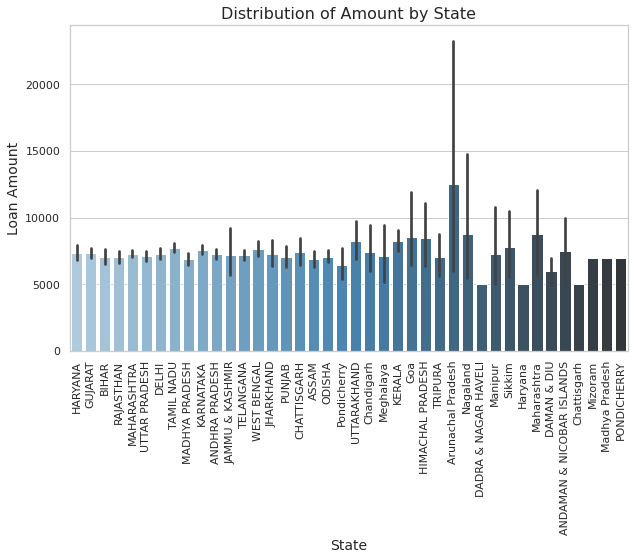

In [ ]:
sorted_dataset = port.sort_values("Loan Amount")

# create a bar chart using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Loan Amount", data=sorted_dataset, palette="Blues_d")

# add labels to the plot
plt.xlabel("State", size=14)
plt.ylabel("Loan Amount", size=14)
plt.title("Distribution of Amount by State", size=16)

# rotate x-tick labels
plt.xticks(rotation=90)

plt.show()

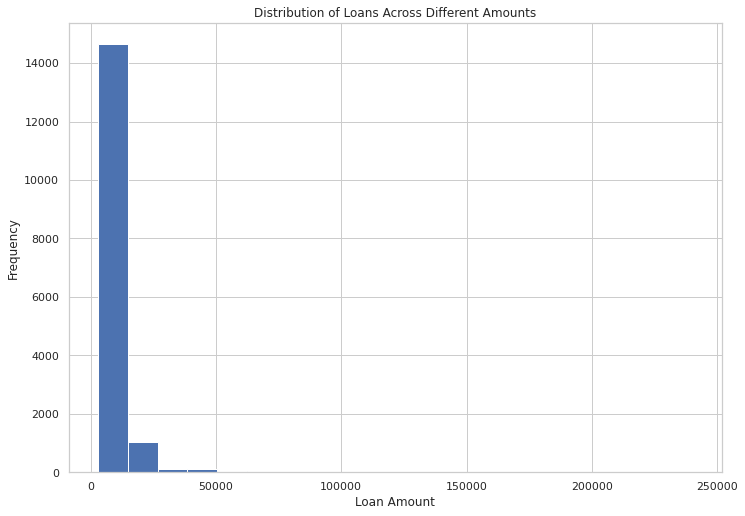

In [ ]:
loan_amounts = port['Loan Amount']

ax = loan_amounts.plot(kind='hist', bins=20)

ax.set_xlabel('Loan Amount')


ax.set_ylabel('Frequency')


ax.set_title('Distribution of Loans Across Different Amounts')

# Show the plot
plt.show()

In [ ]:
#DOB has a combination of data , we need to convert it into Age for that we first need to transform it.


In [ ]:
port_df = pd.read_csv('/content/Portfolio_data.csv')
port_df['DOB'] = pd.to_datetime(port_df['DOB'], errors='coerce')

# Identifying any rows where the date column is NaT (i.e., invalid dates)
invalid_dates = port_df[port_df['DOB'].isna()]
print("Invalid dates:")
print(invalid_dates)

# Removing any rows with invalid dates from the dataframe
port_df = port_df.dropna(subset=['DOB'])



Invalid dates:
       Loan Number    Due Date       State DOB  Loan Amount
7322       1704945  2022-11-02  TAMIL NADU NaT       5017.0
14140      1802690  2022-11-19     HARYANA NaT       5000.0


In [ ]:
# Convert the "date" column into a datetime format
port_df['DOB'] = pd.to_datetime(port_df['DOB'])

port_df['year'] = port_df['DOB'].dt.year
port_df['month'] = port_df['DOB'].dt.month
port_df['day'] = port_df['DOB'].dt.day
port_df['time'] = port_df['DOB'].dt.time

port_df = port_df.sort_values(by='DOB')

print(port_df.head())

      Loan Number    Due Date            State        DOB  Loan Amount  year  \
4525      1652844  2022-11-03        KARNATAKA 1943-06-19       5063.0  1943   
2739      1595629  2022-11-02      MAHARASHTRA 1951-03-04       5000.0  1951   
5092      1664620  2022-11-17  JAMMU & KASHMIR 1952-05-10       5000.0  1952   
5728      1676913  2022-11-15            BIHAR 1955-01-01       5083.0  1955   
5531      1673954  2022-11-20          HARYANA 1958-04-11       5000.0  1958   

      month  day      time  
4525      6   19  00:00:00  
2739      3    4  00:00:00  
5092      5   10  00:00:00  
5728      1    1  00:00:00  
5531      4   11  00:00:00  


In [ ]:
import datetime as dt
port_df['DOB'] = pd.to_datetime(port_df['DOB'], format='%d-%m-%Y')

# Calculate the age by subtracting the birth year from the current year
now = pd.to_datetime(dt.datetime.now())
port['Age'] = (now.year - port_df['DOB'].dt.year)

# Print the first 5 rows to verify the changes
print(port.head())

   Loan Number    Due Date          State                  DOB  Loan Amount  \
0      1003431  2022-10-31      KARNATAKA  1987-02-09 00:00:00     240000.0   
1      1004356  2022-10-31    MAHARASHTRA  1994-05-23 00:00:00      56000.0   
2      1004464  2022-11-01  UTTAR PRADESH  1996-12-01 00:00:00      50000.0   
3      1004626  2022-11-01         KERALA  1995-07-14 00:00:00      63000.0   
4      1005011  2022-11-01    MAHARASHTRA  1994-05-30 00:00:00      50000.0   

    Age  
0  36.0  
1  29.0  
2  27.0  
3  28.0  
4  29.0  


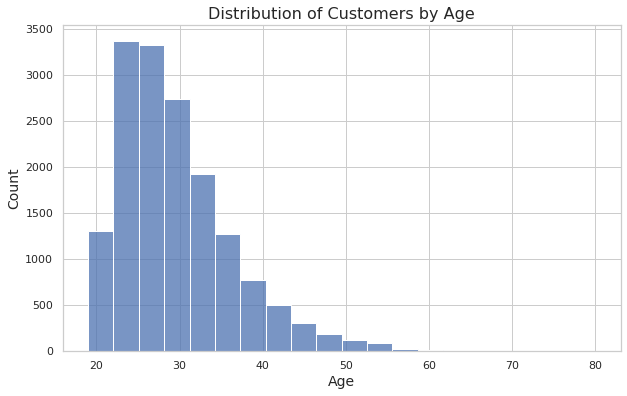

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=port, x="Age", bins=20)

# add labels to the plot
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Customers by Age", size=16)

plt.show()

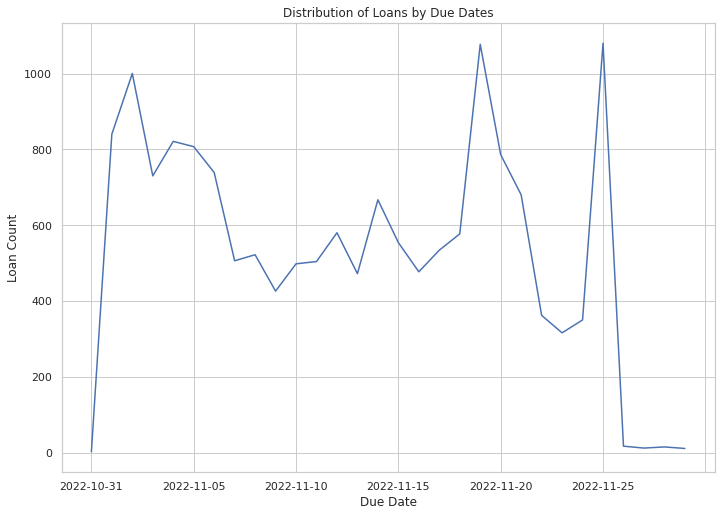

In [ ]:
loan_count_by_due_date = port.groupby('Due Date')['Loan Number'].count()

loan_count_by_due_date.plot()
plt.xlabel('Due Date')
plt.ylabel('Loan Count')
plt.title('Distribution of Loans by Due Dates')
plt.show()

In [ ]:
comm['Call time'] = pd.to_datetime(comm['Call time'])

# Filter the dataframe to only include completed calls
completed_calls = comm[comm['Status'] == 'completed']

# Group the dataframe by the call date column and count the number of unique borrowers in each group
unique_borrowers_by_call_date = completed_calls.groupby('Call time')['Loan Number'].nunique()

# Print the resulting dataframe
print(unique_borrowers_by_call_date)

Call time
2022-12-02 02:59:40.973000+00:00    1
2022-12-02 03:57:51.335000+00:00    1
2022-12-02 04:34:26.950000+00:00    1
2022-12-02 04:34:57.213000+00:00    1
2022-12-02 04:36:21.594000+00:00    1
                                   ..
2022-12-07 17:57:44.814000+00:00    1
2022-12-07 18:38:06.691000+00:00    1
2022-12-07 20:03:30.600000+00:00    1
2022-12-07 20:05:00.526000+00:00    1
2022-12-07 23:25:16.448000+00:00    1
Name: Loan Number, Length: 70545, dtype: int64


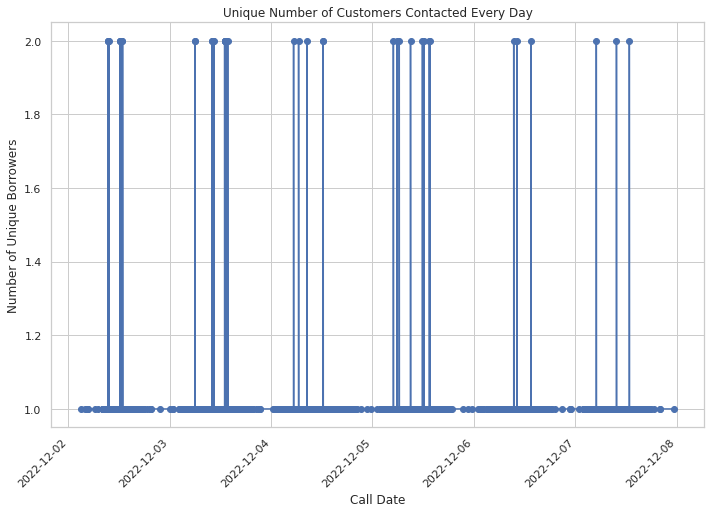

In [ ]:
comm['call_date'] = pd.to_datetime(comm['Call time'])

# Filter the dataframe to only include completed calls
completed_calls = comm[comm['Status'] == 'completed']

# Group the dataframe by the call date column and count the number of unique borrowers in each group
unique_borrowers_by_call_date = completed_calls.groupby('Call time')['Loan Number'].nunique()

# Create a line plot of the unique borrowers by call date
ax = unique_borrowers_by_call_date.plot(kind='line', marker='o')

# Set the x-axis label to "Call Date"
ax.set_xlabel('Call Date')

# Set the y-axis label to "Number of Unique Borrowers"
ax.set_ylabel('Number of Unique Borrowers')

# Set the title of the plot to "Unique Number of Customers Contacted Every Day"
ax.set_title('Unique Number of Customers Contacted Every Day')

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
comm['Call time'] = pd.to_datetime(comm['Call time'])

# group data by day and count unique borrowers for each day
unique_borrowers_per_day = comm[comm['Status'] == 'completed'].groupby(comm['Call time'].dt.date)['Loan Number'].nunique()

# print the resulting series
print(unique_borrowers_per_day)

Call time
2022-12-02    7845
2022-12-03    6929
2022-12-04    6103
2022-12-05    6284
2022-12-06    5665
2022-12-07    4261
Name: Loan Number, dtype: int64


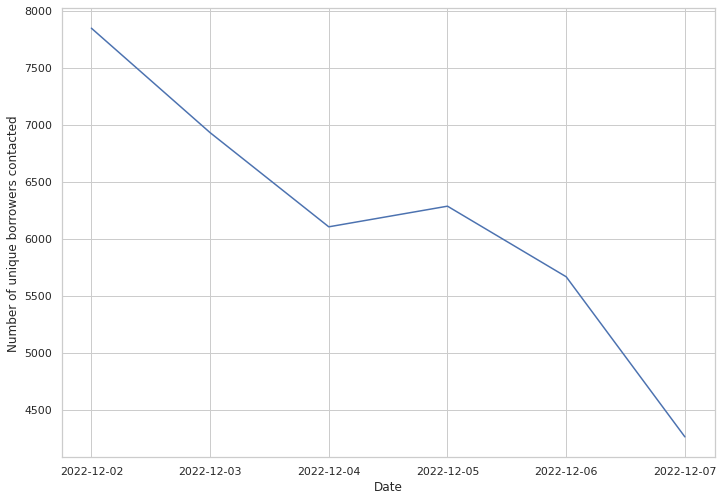

In [ ]:
unique_borrowers_per_day.plot()

# set x-axis label
plt.xlabel('Date')

# set y-axis label
plt.ylabel('Number of unique borrowers contacted')

# show the plot
plt.show()

In [ ]:
comm['Call time'] = pd.to_datetime(comm['Call time'])

# filter for only completed calls
df_completed = comm[comm['Status'] == 'completed']

# count the number of unique borrowers contacted on each day
unique_borrowers_per_day = df_completed.groupby(df_completed['Call time'].dt.date)['Loan Number'].nunique()

# count the total number of unique borrowers in the dataset
total_unique_borrowers = df_completed['Loan Number'].nunique()

# calculate the number of borrowers not contacted on each day
not_contacted_per_day = total_unique_borrowers - unique_borrowers_per_day

# print the result
print(not_contacted_per_day)

Call time
2022-12-02    3372
2022-12-03    4288
2022-12-04    5114
2022-12-05    4933
2022-12-06    5552
2022-12-07    6956
Name: Loan Number, dtype: int64


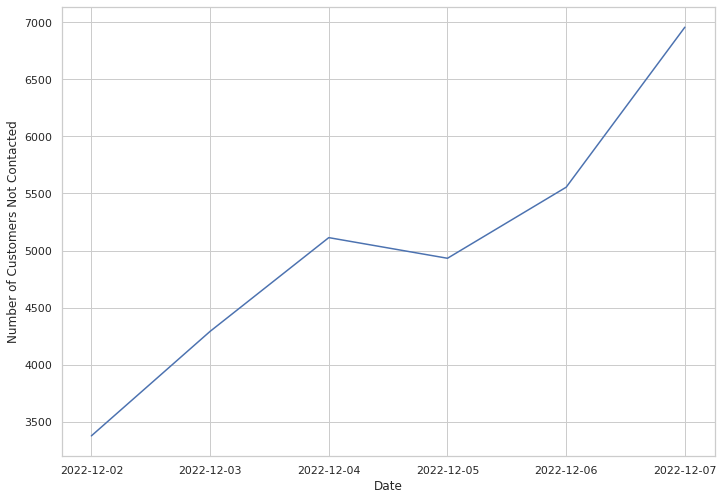

In [ ]:
comm['Call time'] = pd.to_datetime(comm['Call time'])

# Get unique customers
unique_customers = set(comm['Loan Number'])

# Get unique customers contacted each day
unique_customers_contacted = []
for date in pd.date_range(start=comm['Call time'].min().date(), end=comm['Call time'].max().date()):
    customers_contacted = set(comm[comm['Call time'].dt.date == date.date()]['Loan Number'])
    unique_customers_contacted.append(len(customers_contacted))

# Get number of customers not contacted each day
customers_not_contacted = [len(unique_customers) - count for count in unique_customers_contacted]

# Plot results
plt.plot(pd.date_range(start=comm['Call time'].min().date(), end=comm['call_date'].max().date()), customers_not_contacted)
plt.xlabel('Date')
plt.ylabel('Number of Customers Not Contacted')
plt.show()

In [ ]:
borrower_contact_counts = comm['Loan Number'].value_counts()

df_borrower_contact_counts = pd.merge(port[['Loan Number', 'Loan Amount']], borrower_contact_counts, left_on='Loan Number', right_index=True)

# sort the dataframe by the contact counts in descending order
df_borrower_contact_counts = df_borrower_contact_counts.sort_values(by='Loan Number', ascending=False)

# print the top 10 borrowers who have been contacted the most along with their loan amounts
print(df_borrower_contact_counts.head(10))

       Loan Number  Loan Number_x  Loan Amount  Loan Number_y
15951      1881403        1881403       5150.0              4
15950      1851920        1851920       3605.0              2
15949      1837431        1837431       5150.0              1
15948      1836875        1836875       5150.0             12
15947      1829638        1829638       4841.0              6
15946      1823966        1823966       3000.0              5
15944      1823931        1823931       5000.0              1
15942      1823912        1823912       5000.0              3
15941      1823903        1823903       5000.0              5
15940      1823885        1823885       5000.0             17


In [ ]:
contact_count = comm['Loan Number'].value_counts()

# get the customers who have been contacted the least
contact_least = contact_count[contact_count == contact_count.min()].index.tolist()

# merge with the port dataset to get more information about these customers
contact_least_info = port[port['Loan Number'].isin(contact_least)][['Loan Number', 'DOB', 'Loan Amount']]
least_contacted = list(borrower_contact_counts[borrower_contact_counts == borrower_contact_counts.min()].index)
print(least_contacted[:10])

[1695122, 1779362, 1810328, 1805522, 1810175, 1736870, 1741717, 1621194, 1640843, 1783365]


In [ ]:
unique_customers = set(port['Loan Number'])
contacted_customers = set(comm['Loan Number'])

not_contacted_customers = unique_customers - contacted_customers
num_not_contacted_customers = len(not_contacted_customers)
print(num_not_contacted_customers)

4752


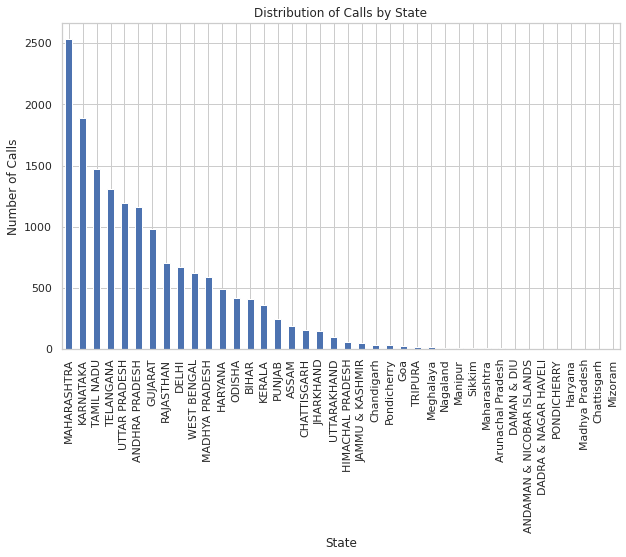

In [ ]:


# Get the value counts of calls by state
state_counts = port['State'].value_counts()

# Create a bar plot of the state counts
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.title('Distribution of Calls by State')
plt.xlabel('State')
plt.ylabel('Number of Calls')
plt.show()

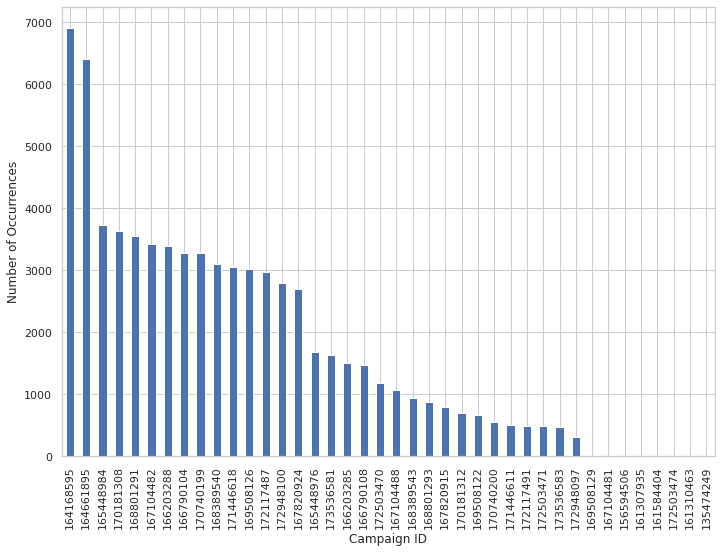

In [ ]:
#comm['Campaign ID'].value_counts()
campaign_counts = comm['Campaign ID'].value_counts()
campaign_counts.plot(kind='bar')
plt.xlabel('Campaign ID')
plt.ylabel('Number of Occurrences')
plt.show()

In [ ]:
port.head(
  
)

,Loan Number,Due Date,State,DOB,Loan Amount,Age
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0,36.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23 00:00:00,56000.0,29.0
2,1004464,2022-11-01,UTTAR PRADESH,1996-12-01 00:00:00,50000.0,27.0
3,1004626,2022-11-01,KERALA,1995-07-14 00:00:00,63000.0,28.0
4,1005011,2022-11-01,MAHARASHTRA,1994-05-30 00:00:00,50000.0,29.0


In [ ]:
campaign_counts = comm.groupby('Campaign ID')['Loan Number'].nunique()

print(campaign_counts)








Campaign ID
135474249       1
156594506       2
161307935       1
161310463       2
161584404       3
164168595    6306
164661895    5833
165448976    1576
165448984    3430
166203285    1450
166203288    3189
166790104    3070
166790108    1408
167104481       5
167104482    3227
167104488    1019
167820915     747
167820924    2578
168389540    2925
168389543     877
168801291    3353
168801293     841
169508122     629
169508126    2878
169508129      11
170181308    3419
170181312     654
170740199    3128
170740200     529
171446611     472
171446618    2902
172117487    2789
172117491     463
172503470    1134
172503471     465
172503474       2
172948097     308
172948100    2663
173536581    1572
173536583     433
Name: Loan Number, dtype: int64
